In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path  = os.getcwd() + '\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='Population', ylabel='Profit'>

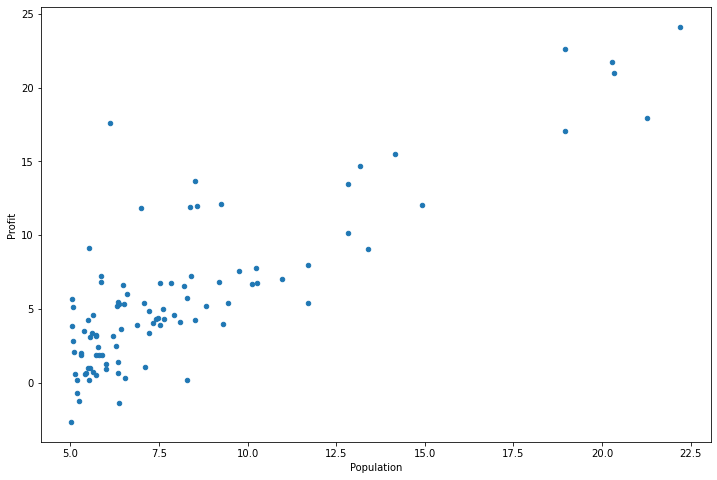

In [6]:
data.plot(kind='scatter', x='Population', y='Profit',figsize=(12,8))

### Implementing Simple Liner Regression

In [7]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T)-y),2)
    return np.sum(inner) / (2 * len(X))

In [8]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

#set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [10]:
# convert from data frame to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [11]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [12]:
computeCost(X, y, theta)

32.072733877455676

In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X*theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j]- ((alpha/len(X)))* np.sum(term)
        theta =temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [21]:
#initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000
# perform gredient decent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [22]:
computeCost(X, y, g)

4.515955503078914

### Results

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

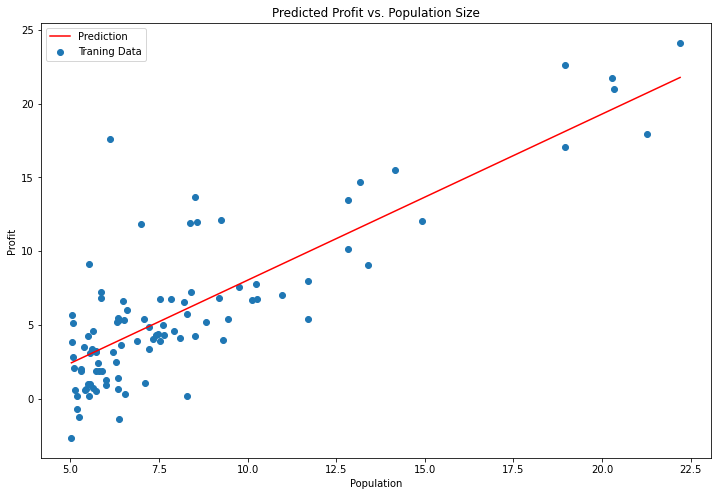

In [27]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0,0]+ (g[0,1]*x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label = 'Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

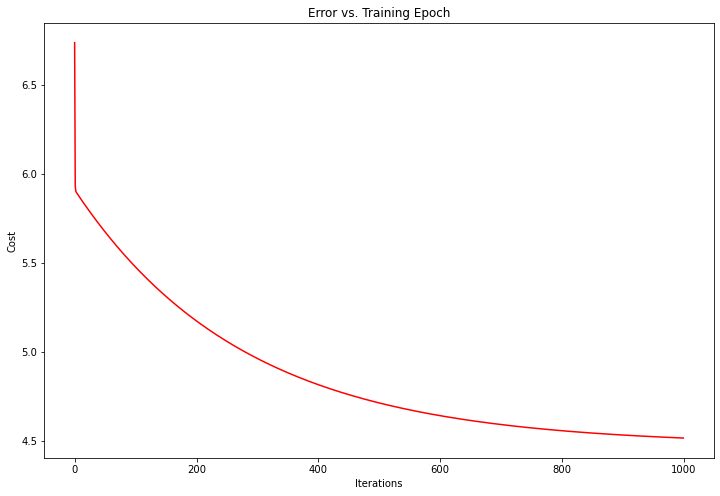

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
